In [5]:
# To aviod the influence of the hub(nodes with )
import networkx as nx
import numpy as np
import os
import matplotlib.pyplot as plt
from textblob import TextBlob
import pandas as pd
from community import community_louvain

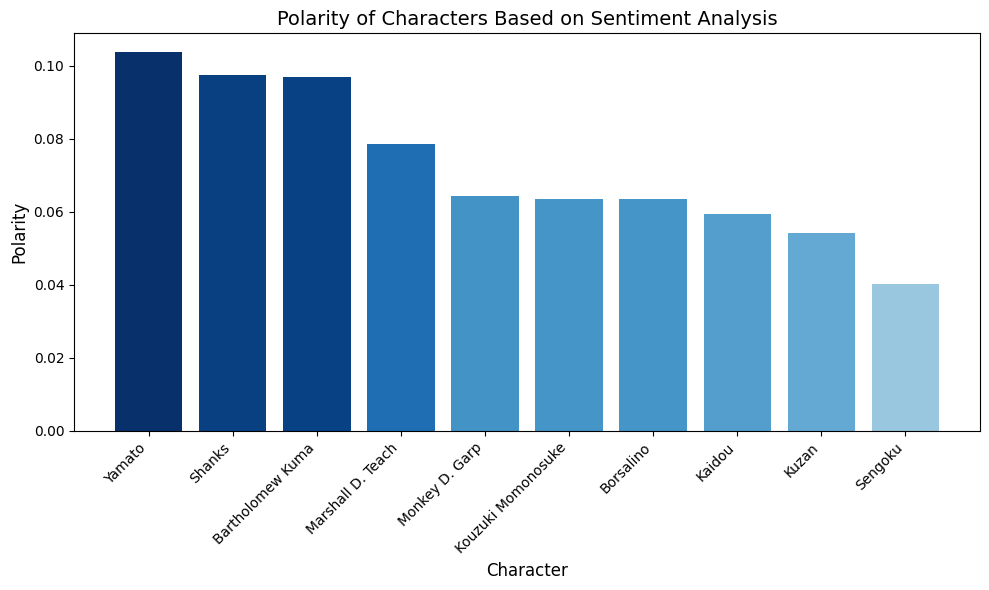

In [6]:
# Define the file path for the GEXF network file
file_path = '../networks/One_Piece.gexf'

# Load the GEXF file into a NetworkX graph
G = nx.read_gexf(file_path)

# Calculate degrees and sort them in descending order
degrees = dict(G.degree())
sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
top_k_nodes = sorted_degrees[:10]  # Select top 10 nodes by degree

# Define the folder path containing the text files
folder_path = '../onepiece_cleaned'  # Replace with the actual path

# Function to find files matching the top nodes
def find_top_degree_nodes(folder_path, top_nodes):
    matched_files = []
    for node, degree in top_nodes:
        for file in os.listdir(folder_path):
            # Match files that start with the node name and end with '.txt'
            if file.startswith(node) and file.endswith('.txt'):
                matched_files.append((file, node))
    return matched_files

# Find the files matching the top degree nodes
matched_files = find_top_degree_nodes(folder_path, top_k_nodes)

# Initialize a list to store results
analysis_results = []

# Perform TextBlob sentiment analysis on each matched file
for file_name, node_name in matched_files:
    file_path = os.path.join(folder_path, file_name)
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            # Perform TextBlob sentiment analysis
            blob = TextBlob(text)
            polarity = blob.sentiment.polarity  # Range: -1 (negative) to 1 (positive)
            subjectivity = blob.sentiment.subjectivity  # Range: 0 (objective) to 1 (subjective)
            # Store the results
            analysis_results.append({
                "Node": node_name,
                "File": file_name,
                "Polarity": polarity,
                "Subjectivity": subjectivity
            })
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Convert results to a DataFrame
results_df = pd.DataFrame(analysis_results)

# Sort the data by polarity for visualization
results_df = results_df.sort_values(by="Polarity", ascending=False)

# Plotting the Polarity Bar Chart
plt.figure(figsize=(10, 6))
colors = plt.cm.Blues(results_df['Polarity'] / max(results_df['Polarity']))  # Scale color intensity
plt.bar(results_df['Node'], results_df['Polarity'], color=colors)
plt.xlabel('Character', fontsize=12)
plt.ylabel('Polarity', fontsize=12)
plt.title('Polarity of Characters Based on Sentiment Analysis', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


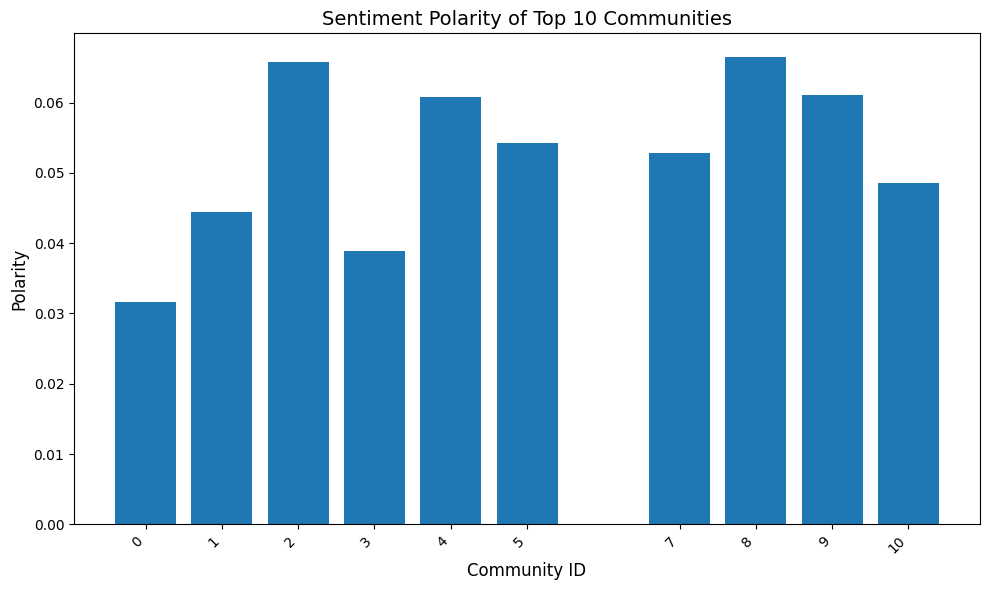

In [7]:
# Define the path to the GEXF file
file_path = '../networks/One_Piece.gexf'

# Load the GEXF file into a NetworkX graph
G = nx.read_gexf(file_path)

# Perform community detection using the Louvain algorithm
partition = community_louvain.best_partition(G)

# Group nodes by their community ID
community_nodes = {}
for node, community_id in partition.items():
    if community_id not in community_nodes:
        community_nodes[community_id] = []
    community_nodes[community_id].append(node)

# Get the top 10 communities based on the number of nodes (descending order)
top_communities = sorted(community_nodes.items(), key=lambda x: len(x[1]), reverse=True)[:10]

# Define the folder path containing text files
folder_path = '../onepiece_cleaned'

# Initialize a list to store sentiment analysis results for each community
community_results = []

# Process each community to combine text files and perform sentiment analysis
for community_id, nodes in top_communities:
    combined_text = ""  # Initialize an empty string to hold combined text
    for node in nodes:
        for file in os.listdir(folder_path):
            # Match files that start with the node name and end with '.txt'
            if file.startswith(node) and file.endswith('.txt'):
                file_path = os.path.join(folder_path, file)
                try:
                    # Read the content of the text file
                    with open(file_path, 'r', encoding='utf-8') as f:
                        combined_text += f.read() + " "  # Append text content
                except Exception as e:
                    print(f"Error reading file {file}: {e}")
    # Perform sentiment analysis on the combined text
    if combined_text.strip():  # Ensure the text is not empty
        blob = TextBlob(combined_text)
        polarity = blob.sentiment.polarity  # Sentiment polarity: -1 (negative) to 1 (positive)
        subjectivity = blob.sentiment.subjectivity  # Subjectivity: 0 (objective) to 1 (subjective)
        # Store the analysis results
        community_results.append({
            "Community ID": community_id,
            "Number of Nodes": len(nodes),
            "Polarity": polarity,
            "Subjectivity": subjectivity
        })

# Convert the results into a Pandas DataFrame
results_df = pd.DataFrame(community_results)

# Sort the results by polarity for visualization
results_df = results_df.sort_values(by="Polarity", ascending=False)

# Visualize sentiment polarity using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(results_df['Community ID'], results_df['Polarity'], tick_label=results_df['Community ID'])
plt.xlabel('Community ID', fontsize=12)
plt.ylabel('Polarity', fontsize=12)
plt.title('Sentiment Polarity of Top 10 Communities', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Display the chart
plt.show()
